In [4]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Upload from CSVs
bosch_path = "BoschGrades.csv"
lawrence_path = "lawrence_ela.csv"

#Read data and results
bosch_df = pd.read_csv(bosch_path)
lawrence_df = pd.read_csv(lawrence_path)

bosch_df.head()

,Score,Hour
0,0.38,7
1,0.86,7
2,0.92,7
3,0.58,7
4,0.88,7


In [5]:
#Savage Data Types
bosch_df.dtypes

Score    float64
Hour       int64
dtype: object

In [6]:
bosch_df["Percent"] = bosch_df["Score"]*100
bosch_df["Percent"] = bosch_df["Percent"].astype("int64")

bosch_df.head()

,Score,Hour,Percent
0,0.38,7,38
1,0.86,7,86
2,0.92,7,92
3,0.58,7,57
4,0.88,7,88


In [7]:
#Write as letter grade
letter_grades=[]

for row in bosch_df["Percent"]:
    if row >= 90:
        letter_grades.append("A")
    elif row >=80:
        letter_grades.append("B")
    elif row >=70:
        letter_grades.append("C")
    elif row >=60:
        letter_grades.append("D")
    elif row <60:
        letter_grades.append("F")

#Create new column
bosch_df["letter_grades"]=letter_grades
bosch_df.head()

,Score,Hour,Percent,letter_grades
0,0.38,7,38,F
1,0.86,7,86,B
2,0.92,7,92,A
3,0.58,7,57,F
4,0.88,7,88,B


In [70]:
#Savage

#Hours
bosch_5_df = bosch_df.loc[bosch_df["Hour"]==5]
bosch_6_df = bosch_df.loc[bosch_df["Hour"]==6]
bosch_7_df = bosch_df.loc[bosch_df["Hour"]==7]


#Mean
bosch_mean = bosch_df["Percent"].mean()
bosch_5_mean = bosch_5_df["Percent"].mean()
bosch_6_mean = bosch_6_df["Percent"].mean()
bosch_7_mean = bosch_7_df["Percent"].mean()


#Median
bosch_median = bosch_df["Percent"].median()
bosch_5_median = bosch_5_df["Percent"].median()
bosch_6_median = bosch_6_df["Percent"].median()
bosch_7_median = bosch_7_df["Percent"].median()


#Max
bosch_max = bosch_df["Percent"].max()
bosch_5_max = bosch_5_df["Percent"].max()
bosch_6_max = bosch_6_df["Percent"].max()
bosch_7_max = bosch_7_df["Percent"].max()


# #Min
bosch_min = bosch_df["Percent"].min()
bosch_5_min = bosch_5_df["Percent"].min()
bosch_6_min = bosch_6_df["Percent"].min()
bosch_7_min = bosch_7_df["Percent"].min()


# #Range
bosch_range = bosch_max - bosch_min
bosch_5_range = bosch_5_max - bosch_5_min
bosch_6_range = bosch_6_max - bosch_6_min
bosch_7_range = bosch_7_max - bosch_7_min


index = ["Mean", "Median", "Range", "Min", "Max"]
bosch_data_df=pd.DataFrame({
                           "All Hours": [bosch_mean, bosch_median, bosch_range, bosch_min, bosch_max],
                            "Hour 5": [bosch_5_mean, bosch_5_median, bosch_5_range, bosch_5_min, bosch_5_max],
                            "Hour 6": [bosch_6_mean, bosch_6_median, bosch_6_range, bosch_6_min, bosch_6_max],
                            "Hour 7": [bosch_7_mean, bosch_7_median, bosch_7_range, bosch_7_min, bosch_7_max]}, index = index)

# #Change to int
bosch_data_df["All Hours"] = bosch_data_df["All Hours"].astype("int64")
bosch_data_df["Hour 5"] = bosch_data_df["Hour 5"].astype("int64")
bosch_data_df["Hour 6"] = bosch_data_df["Hour 6"].astype("int64")
bosch_data_df["Hour 7"] = bosch_data_df["Hour 7"].astype("int64")

bosch_data_df

transpose_bosch_df = bosch_data_df.transpose()

bosch_data_df.head()

,All Hours,Hour 5,Hour 6,Hour 7
Mean,76,80,80,71
Median,82,82,87,74
Range,72,51,49,72
Min,27,45,47,27
Max,99,96,96,99


In [496]:
#Lawrence

#Convert Data Types
lawrence_df["Percent"] = lawrence_df["Score"]*100
lawrence_df["Percent"] = lawrence_df["Percent"].astype("int64")

#Assign Letter Grades
letter_grades=[]

for row in lawrence_df["Percent"]:
    if row >= 90:
        letter_grades.append("A")
    elif row >=80:
        letter_grades.append("B")
    elif row >=70:
        letter_grades.append("C")
    elif row >=60:
        letter_grades.append("D")
    elif row <60:
        letter_grades.append("F")

#Create new column
lawrence_df["letter_grades"]=letter_grades

lawrence_df.head()

,Score,Percent,letter_grades
0,0.80,80,B
1,0.88,88,B
2,0.70,70,C
3,0.85,85,B
4,0.93,93,A


In [413]:
#Lawrence Count and Sort
lawrence_counts_df = (lawrence_df["letter_grades"].value_counts())

lawrence_counts_df = pd.DataFrame(lawrence_counts_df)
lawrence_counts_df = lawrence_counts_df.sort_values(by=["letter_grades"])
lawrence_counts_df.head()

,count
letter_grades,
A,30
B,29
C,21
D,4
F,12


In [503]:
#Lawrence
#Mean
lawrence_mean = lawrence_df["Percent"].mean()
#Median
lawrence_median = lawrence_df["Percent"].median()
#Max
lawrence_max = lawrence_df["Percent"].max()
# #Min
lawrence_min = lawrence_df["Percent"].min()
#Range
lawrence_range = lawrence_max - lawrence_min
index = ["Mean", "Median", "Range", "Min", "Max"]
lawrence_data_df=pd.DataFrame({
                           "All Hours": [lawrence_mean, lawrence_median, lawrence_range, lawrence_min, lawrence_max]}, index = index)
#Change to int
lawrence_data_df["All Hours"] = lawrence_data_df["All Hours"].astype("int64")
lawrence_data_df
transpose_lawrence_df = lawrence_data_df.transpose()

transpose_lawrence_df

,Mean,Median,Range,Min,Max
All Hours,79,84,97,3,100


In [515]:
# #Merge Teachers
# merged_teachers_df = pd.merge(transpose_savage_df, transpose_lawrence_df, how="outer")
# merged_teachers_df = merged_teachers_df.iloc[[0,5]]
# merged_teachers_df = merged_teachers_df.rename(index={0:"Math", 5:"ELA"})
# merged_teachers_df = merged_teachers_df.transpose()
# merged_teachers_df

,Math,ELA
Mean,73,79
Median,79,84
Range,76,97
Min,24,3
Max,100,100


In [21]:
#Bosch Letter Grade Counts
#Counts by grade
bosch_grade_5_df = (bosch_5_df["letter_grades"].value_counts())
bosch_grade_6_df = (bosch_6_df["letter_grades"].value_counts())
bosch_grade_7_df = (bosch_7_df["letter_grades"].value_counts())


#DataFrame
bosch_grade_5_df = pd.DataFrame(bosch_grade_5_df)
bosch_grade_6_df = pd.DataFrame(bosch_grade_6_df)
bosch_grade_7_df = pd.DataFrame(bosch_grade_7_df)


#Merge and Rename 1
merged_df = pd.merge(bosch_grade_5_df, bosch_grade_6_df,how="outer", on = "letter_grades")

merged_df = merged_df.rename(columns = {"count_x":"Hour 5", "count_y":"Hour 6"})

#Merge and Rename 2
merged_df = pd.merge(merged_df, bosch_grade_7_df, how="outer", on="letter_grades")
merged_df = merged_df.rename(columns = {"count":"Hour 7"})


#Sort
merged_df = merged_df.sort_values(by=["letter_grades"])


transpose_df = merged_df.transpose()

transpose_df.head()


letter_grades,A,B,C,D,F
Hour 5,3,7,4,1,1
Hour 6,8,4,4,1,3
Hour 7,3,8,2,6,5


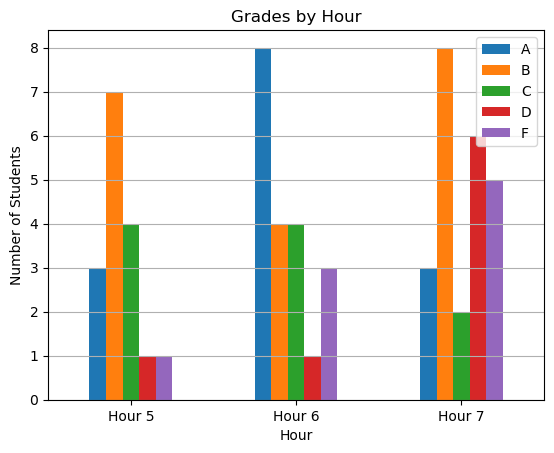

In [22]:
#Bosch Bar Graph
#Group plots by grade
multi_plot = transpose_df.plot(kind="bar", rot=0)

plt.legend()
plt.grid(axis = "y")
plt.xlabel("Hour")
plt.ylabel("Number of Students")
plt.title("Grades by Hour")
plt.savefig('Bosch.png')
plt.show()




In [23]:
#Copy Data Frame
all_df = merged_df.copy()
all_df["All"] = all_df["Hour 5"]+all_df["Hour 6"]+all_df["Hour 7"]
all_df

,Hour 5,Hour 6,Hour 7,All
letter_grades,,,,
A,3,8,3,14
B,7,4,8,19
C,4,4,2,10
D,1,1,6,8
F,1,3,5,9


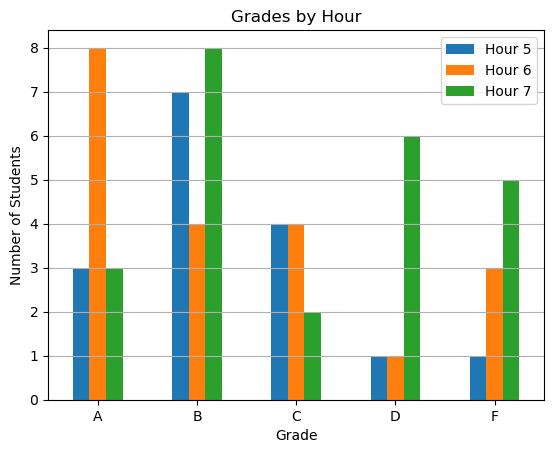

<Figure size 640x480 with 0 Axes>

In [24]:
#Group plots by grade
multi_plot = merged_df.plot(kind="bar", rot=0)

plt.legend()
plt.grid(axis = "y")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.title("Grades by Hour")
plt.savefig('BoschByGrade.png')
plt.show()
plt.tight_layout()


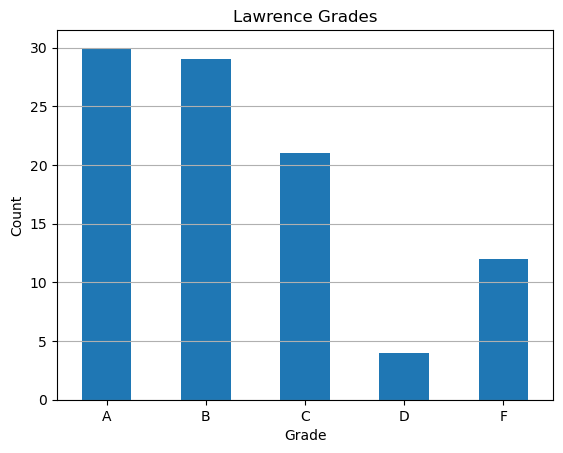

In [476]:
# #ELA Bar Graph
# lawrence_counts_df["count"].plot(kind="bar", rot=0)
# plt.grid(axis="y")
# plt.title("Lawrence Grades")
# plt.xlabel("Grade")
# plt.ylabel("Count")
# plt.savefig("LawrenceGrades.png")
# plt.show()

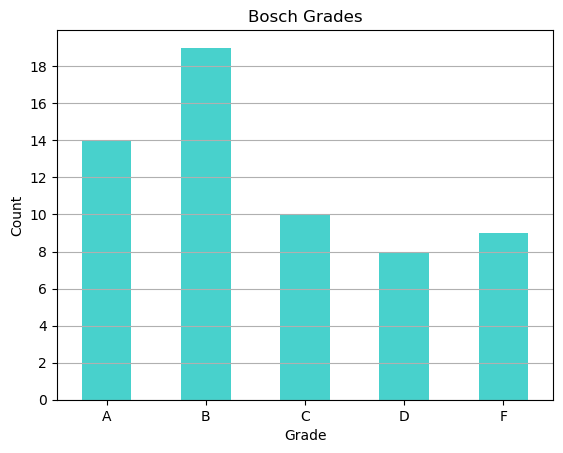

In [67]:
#Bosch All Bar Graph
all_df["All"].plot(kind="bar", color="mediumturquoise", yticks=range(0, 20, 2), rot=0)
plt.grid(axis="y")
plt.title("Bosch Grades")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.savefig("BoschAllBar.png")
plt.show()

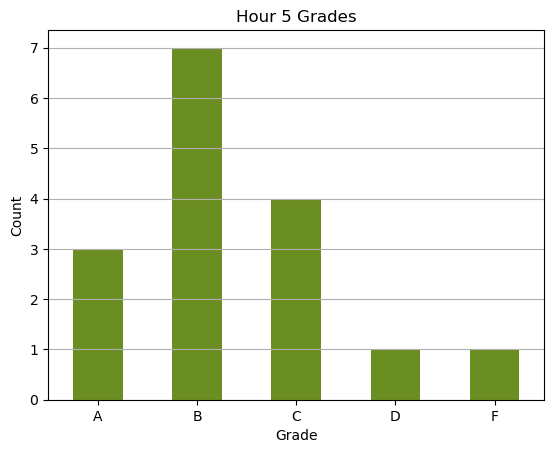

In [26]:
#Bosch Hour 5 Bar Graph
all_df["Hour 5"].plot(kind="bar", color="olivedrab", rot=0)
plt.grid(axis="y")
plt.title("Hour 2 Grades")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.savefig("BoschBar.png")
plt.show()

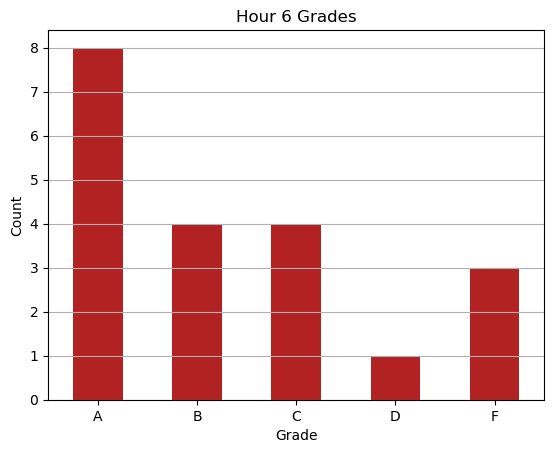

In [27]:
#Bosch Hour 6 Bar Graph
all_df["Hour 6"].plot(kind="bar", color="firebrick", rot=0)
plt.grid(axis="y")
plt.title("Hour 6 Grades")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.savefig("BoschHour6Bar.png")
plt.show()

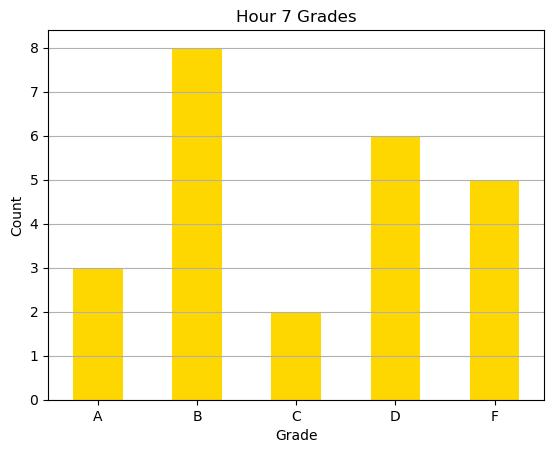

In [28]:
#Bosch Hour 7 Bar Graph
all_df["Hour 7"].plot(kind="bar", color="gold", rot=0)
plt.grid(axis="y")
plt.title("Hour 7 Grades")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.savefig("BoschHour7Bar.png")
plt.show()

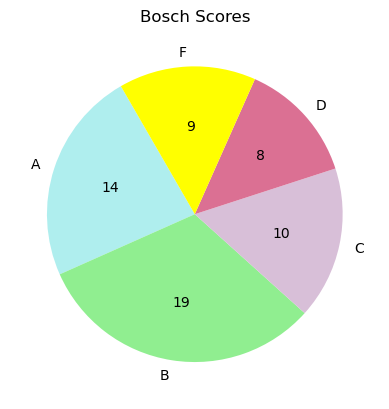

In [29]:
#Bosch Piechart All
labels = all_df.index
sizes = all_df["All"]
colors = ["paleturquoise", "lightgreen", "thistle", "palevioletred", "yellow"]

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format
    
plt.title("Bosch Scores")
plt.pie(sizes, labels=labels, colors=colors, autopct=autopct_format(sizes), startangle=120)
plt.savefig('BoschAllPie.png')
plt.show()



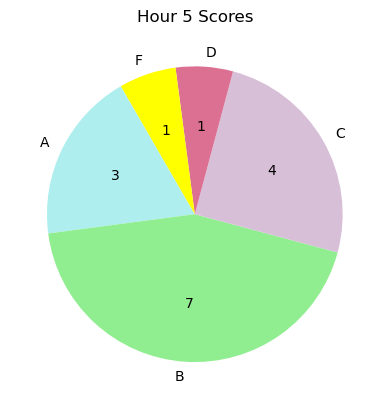

In [31]:
#Bosch Piechart Hour 5
labels = merged_df.index
sizes = merged_df["Hour 5"]
colors = ["paleturquoise", "lightgreen", "thistle", "palevioletred", "yellow"]

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format
    
plt.title("Hour 5 Scores")

plt.pie(sizes, labels=labels, colors=colors, autopct=autopct_format(sizes), startangle=120)
plt.savefig('BoschHour5Pie.png')
plt.show()



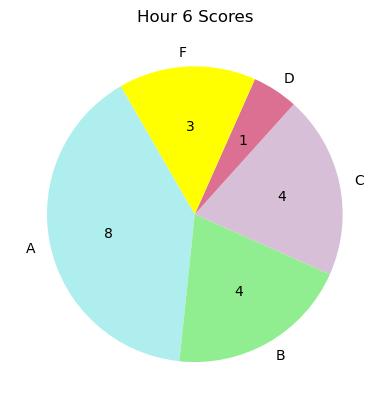

In [32]:
#Bosch Piechart Hour 6
labels = merged_df.index
sizes = merged_df["Hour 6"]
colors = ["paleturquoise", "lightgreen", "thistle", "palevioletred", "yellow"]

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format
    
plt.title("Hour 6 Scores")

plt.pie(sizes, labels=labels, colors=colors, autopct=autopct_format(sizes), startangle=120)
plt.savefig('BoschHour6Pie.png')
plt.show()



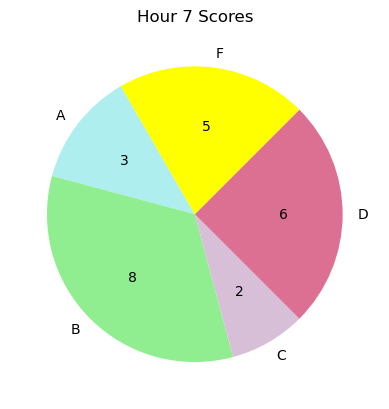

In [33]:
#Savage Piechart Hour 7
labels = merged_df.index
sizes = merged_df["Hour 7"]
colors = ["paleturquoise", "lightgreen", "thistle", "palevioletred", "yellow"]

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format
    
plt.title("Hour 7 Scores")

plt.pie(sizes, labels=labels, colors=colors, autopct=autopct_format(sizes), startangle=120)
plt.savefig('BoschHour7Pie.png')
plt.show()



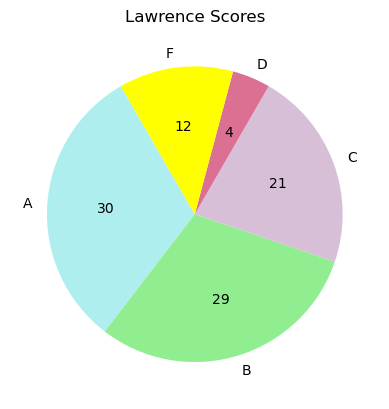

In [470]:
# #Lawrence Grades All
# labels = lawrence_counts_df.index
# sizes = lawrence_counts_df["count"]
# colors = ["paleturquoise", "lightgreen", "thistle", "palevioletred", "yellow"]

# def autopct_format(values):
#     def my_format(pct):
#         total = sum(values)
#         val = int(round(pct*total/100.0))
#         return '{v:d}'.format(v=val)
#     return my_format
    
# plt.title("Lawrence Scores")

# plt.pie(sizes, labels=labels, colors=colors, autopct=autopct_format(sizes), startangle=120)
# plt.savefig('LawrenceAllPie.png')
# plt.show()



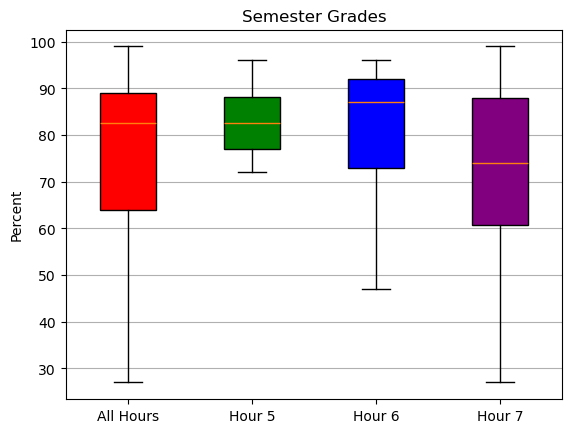

In [35]:
#Bosch by Hour

label = ["All Hours", "Hour 5", "Hour 6", "Hour 7"]
hour5 = bosch_5_df["Percent"]
hour6 = bosch_6_df["Percent"]
hour7 = bosch_7_df["Percent"]
all = bosch_df["Percent"]

x_axis = [all, hour5, hour6, hour7]
fig1, ax1 = plt.subplots()
ax1.set_title('Semester Grades')
ax1.set_ylabel('Percent')
plt.yticks(np.arange(0,110,10))
bp = ax1.boxplot(x_axis, patch_artist=True, labels = label, showfliers=False)
colors = ["red", "green", "blue", "purple"]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.grid(axis="y")
plt.savefig("BoschBoxPlot.png")
plt.show()

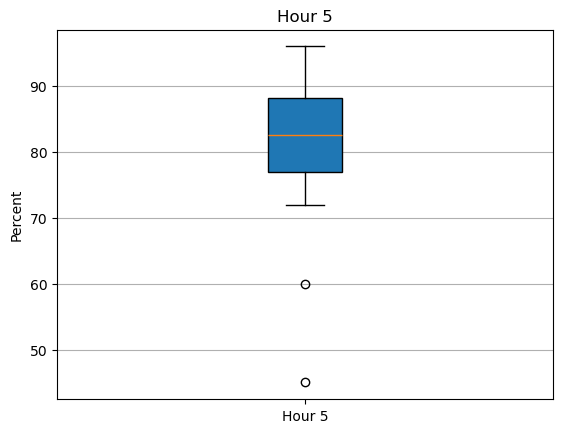

In [44]:
#Bosch Box Plot All
scores = bosch_5_df["Percent"]
fig1, ax1 = plt.subplots()
ax1.set_title('Hour 5')
ax1.set_ylabel('Percent')
label = ["Hour 5"]
plt.grid(axis="y")
ax1.boxplot(scores, patch_artist=True, labels = label)
plt.savefig("BoschHour5Outliers.png")
plt.show()

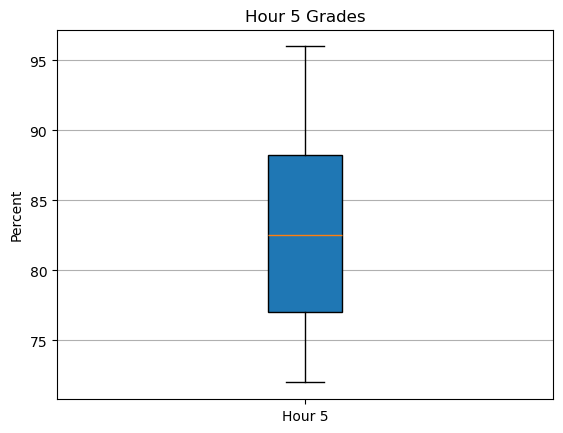

In [45]:
#Bosch Box Plot Hour 5
scores = bosch_5_df["Percent"]
fig1, ax1 = plt.subplots()
ax1.set_title('Hour 5 Grades')
ax1.set_ylabel('Percent')
label = ["Hour 5"]
plt.grid(axis="y")
ax1.boxplot(scores, patch_artist=True, labels = label, showfliers=False)
plt.savefig("BoschHour5BoxNoOutliers.png")
plt.show()

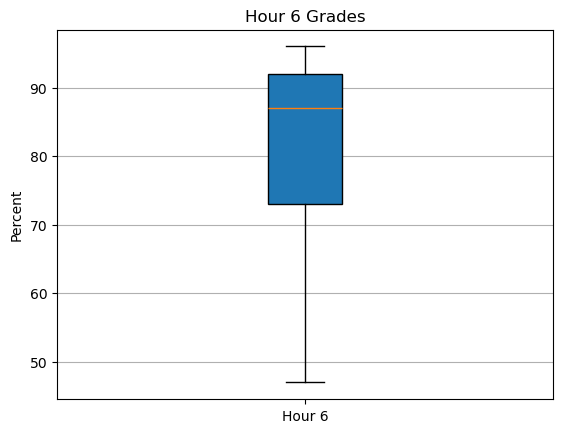

In [46]:
#Bosch Box Plot Hour 6
scores = bosch_6_df["Percent"]
fig1, ax1 = plt.subplots()
ax1.set_title('Hour 6 Grades')
ax1.set_ylabel('Percent')
label = ["Hour 6"]
plt.grid(axis="y")
ax1.boxplot(scores, patch_artist=True, labels = label)
plt.savefig("BoschHour6BoxOutliers.png")
plt.show()

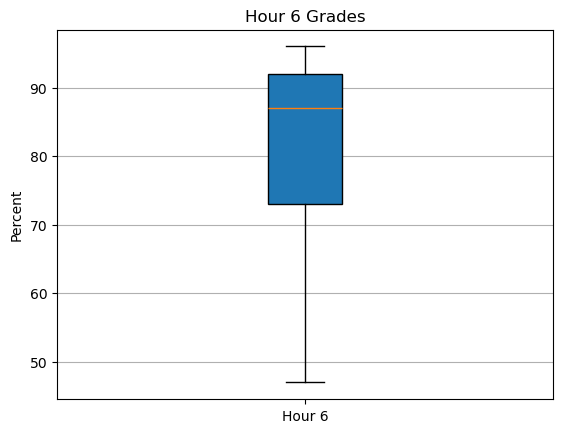

In [47]:
#Bosch Box Plot Hour 6
scores = bosch_6_df["Percent"]
fig1, ax1 = plt.subplots()
ax1.set_title('Hour 6 Grades')
ax1.set_ylabel('Percent')
label = ["Hour 6"]
plt.grid(axis="y")
ax1.boxplot(scores, patch_artist=True, labels = label, showfliers=False)
plt.savefig("BoschHour6BoxNoOutliers.png")
plt.show()

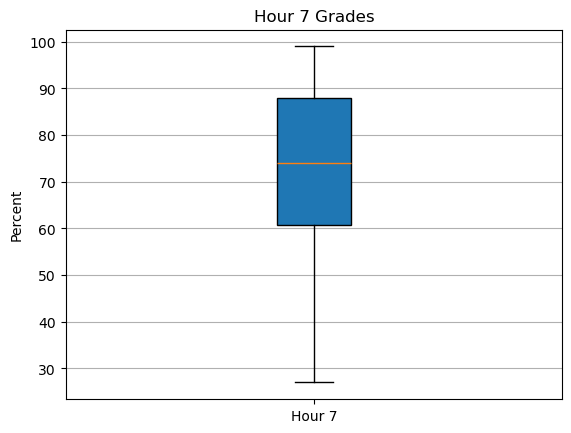

In [48]:
#Bosch Box Plot Hour 7
scores = bosch_7_df["Percent"]
fig1, ax1 = plt.subplots()
ax1.set_title('Hour 7 Grades')
ax1.set_ylabel('Percent')
label = ["Hour 7"]
plt.grid(axis="y")
ax1.boxplot(scores, patch_artist=True, labels = label)
plt.savefig("BoschHour7BoxOutliers.png")
plt.show()

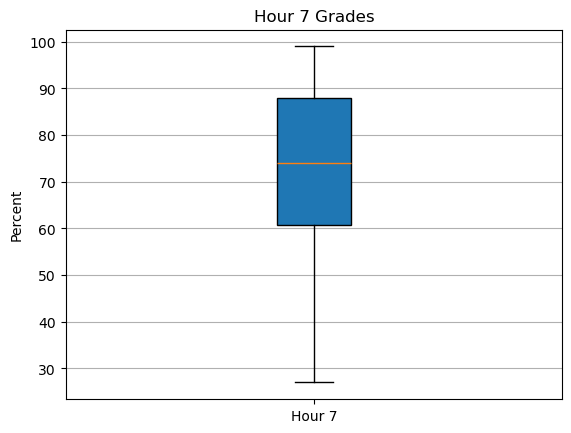

In [50]:
#Bosch Box Plot Hour 6
scores = bosch_7_df["Percent"]
fig1, ax1 = plt.subplots()
ax1.set_title('Hour 7 Grades')
ax1.set_ylabel('Percent')
label = ["Hour 7"]
plt.grid(axis="y")
ax1.boxplot(scores, patch_artist=True, labels = label)
plt.savefig("BoschHour6BoxNoOutliers.png")
plt.show()

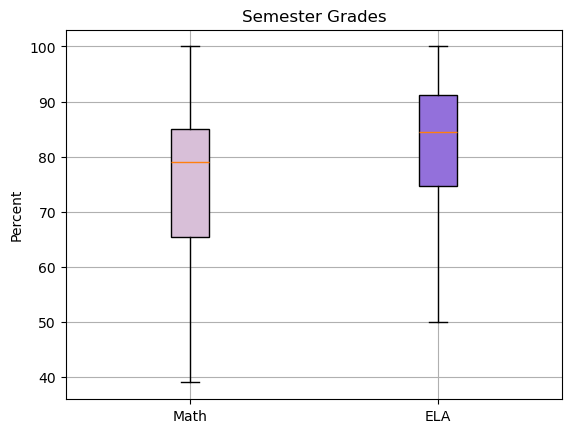

In [471]:
# #Box and Whisker All Classes
# label = ["Math", "ELA"]
# math = savage_df["Percent"]
# ela = lawrence_df["Percent"]
# x_axis = [math, ela]
# fig1, ax1 = plt.subplots()
# ax1.set_title('Semester Grades')
# ax1.set_ylabel('Percent')
# plt.yticks(np.arange(0,110,10))
# bp = ax1.boxplot(x_axis, patch_artist=True, labels = label, showfliers=False)
# colors = ["thistle", "mediumpurple"]
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(color)
# plt.grid()
# plt.savefig("AllBoxPlot.png")

# plt.show()

In [489]:
# #BarGraph All Classes
# #Counts by grade
# savage_grade_df = (savage_df["letter_grades"].value_counts())
# lawrence_grade_df = (lawrence_df["letter_grades"].value_counts())

# #DataFrame
# savage_grade_df = pd.DataFrame(savage_grade_df)
# lawrence_grade_df = pd.DataFrame(lawrence_grade_df)

# #Merge
# merged_df = pd.merge(savage_grade_df, lawrence_grade_df,how="inner", on = "letter_grades")

# #Rename
# merged_df = merged_df.rename(columns = {"count_x":"Math", "count_y":"ELA"})
# #Sort
# merged_df = merged_df.sort_values(by=["letter_grades"])
# #merged_df.head()

# transpose_df = merged_df.transpose()

# transpose_df.head()

letter_grades,A,B,C,D,F
Math,4,29,12,12,11
ELA,30,29,21,4,12


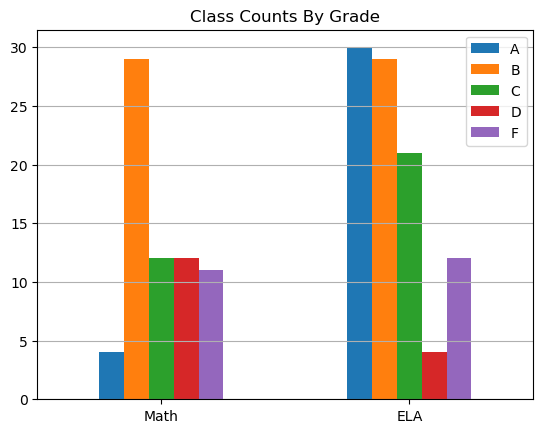

<Figure size 640x480 with 0 Axes>

In [490]:
# #Group plots by grade
# multi_plot = transpose_df.plot(kind="bar", rot=0)

# plt.legend()
# plt.grid(axis = "y")
# plt.title("Class Counts By Grade")
# plt.savefig("ByClassBar.png")
# plt.show()
# plt.tight_layout()

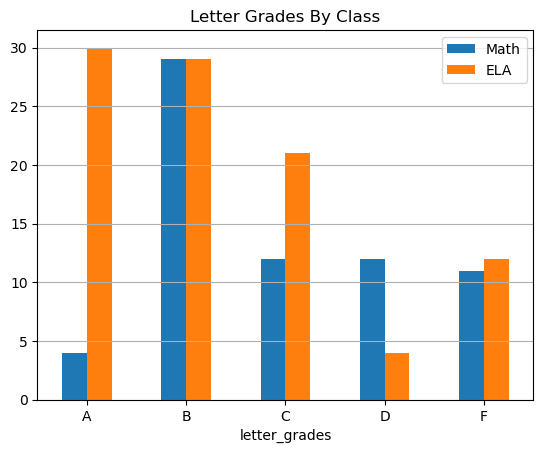

In [492]:
# #Plot by class
# multi_plot = merged_df.plot(kind="bar", rot=0)

# plt.legend()
# plt.grid(axis = "y")
# plt.title("Letter Grades By Class")
# plt.savefig("ByGradeBar.png")
# plt.show()
